In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
df.shape

(94992, 3)

In [ ]:
df.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [ ]:
#df.set_index('datetime',inplace=True)
#df.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [ ]:
df.drop(columns=['row_id'],inplace=True)
df.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [ ]:
df.isnull().sum()

datetime       0
energy      1900
dtype: int64

In [ ]:
df_null = df.isnull()
df_null

,datetime,energy
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
94987,False,False
94988,False,False
94989,False,False
94990,False,False


In [ ]:
df.energy.mean()

1702.9950139487903

In [ ]:
df.energy.median()

1654.4658

In [ ]:
df['energy'].fillna(method = 'ffill',inplace = True)

In [ ]:
df.energy.isnull().sum()

0

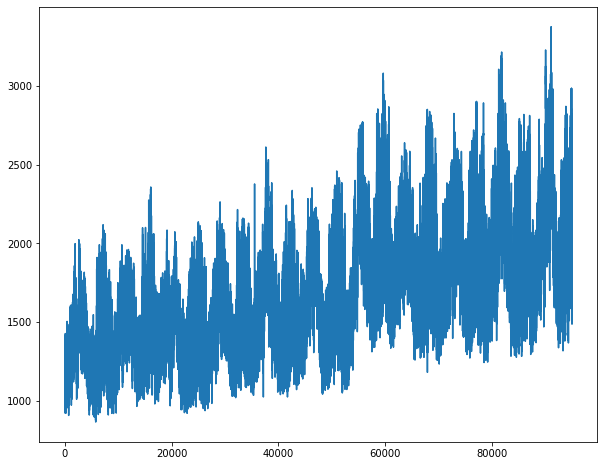

In [ ]:
#plotting the distribution of energy
plt.figure(figsize = (10,8))
plt.plot(df.energy)


###Implementation with fbphrophet

In [ ]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
data = df.copy()

In [ ]:
data.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [ ]:
data.rename(columns = {'datetime':'ds','energy':'y'}, inplace = True)
data.head()

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [ ]:
data.shape[0]*0.80

75993.6

In [ ]:
train = data.iloc[ :75994,:]
validation = data.iloc[75994:,:]

In [ ]:
##creating simple model

model1 = Prophet()
model1.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/vhuvplc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/am4veu6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69153', 'data', 'file=/tmp/tmpjvnh4e0e/vhuvplc6.json', 'init=/tmp/tmpjvnh4e0e/am4veu6q.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model5nynw_z9/prophet_model-20221125042456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:25:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
train.tail()

,ds,y
75989,2016-10-31 05:00:00,1462.5225
75990,2016-10-31 06:00:00,1464.2991
75991,2016-10-31 07:00:00,1452.4974
75992,2016-10-31 08:00:00,1493.6130
75993,2016-10-31 09:00:00,1607.5692


In [ ]:
validation.tail()

,ds,y
94987,2018-12-31 19:00:00,2528.4468
94988,2018-12-31 20:00:00,2461.8836
94989,2018-12-31 21:00:00,2365.9944
94990,2018-12-31 22:00:00,2342.9428
94991,2018-12-31 23:00:00,2180.2176


In [ ]:
#future = model1.make_future_dataframe(periods = 265)
future = pd.DataFrame(data['ds'])


In [ ]:
future

,ds
0,2008-03-01 00:00:00
1,2008-03-01 01:00:00
2,2008-03-01 02:00:00
3,2008-03-01 03:00:00
4,2008-03-01 04:00:00
...,...
94987,2018-12-31 19:00:00
94988,2018-12-31 20:00:00
94989,2018-12-31 21:00:00
94990,2018-12-31 22:00:00


In [ ]:
pred = model1.predict(future)

In [ ]:
prediction = pred[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
prediction.head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-03-01 00:00:00,1228.340485,1027.793985,1424.913078
1,2008-03-01 01:00:00,1145.995375,941.128306,1342.608018
2,2008-03-01 02:00:00,1082.779881,871.597835,1290.534768
3,2008-03-01 03:00:00,1045.321921,842.471482,1253.857366
4,2008-03-01 04:00:00,1038.785399,828.361209,1236.417835


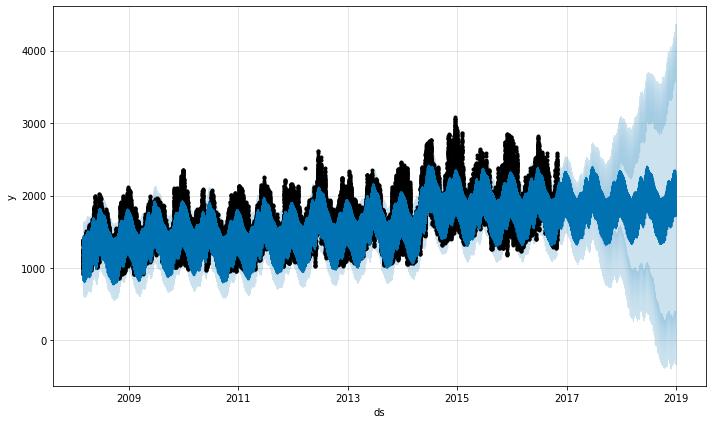

<Figure size 1800x864 with 0 Axes>

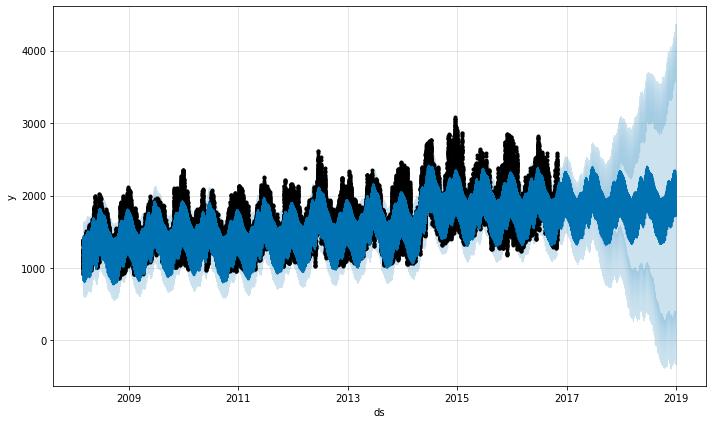

In [ ]:
plt.figure(figsize = (25,12))
#plt.plot(data['y'],label = 'Original',color='b')
#plt.plot(prediction.yhat,label = 'prediction',color='r')
model1.plot(prediction)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(data['y'],prediction['yhat']))
rmse

180.45780058882943

In [ ]:
data.shape, prediction.shape

((94992, 2), (94992, 4))

In [ ]:
data.head()

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [ ]:
prediction.head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-03-01 00:00:00,1228.340485,1027.793985,1424.913078
1,2008-03-01 01:00:00,1145.995375,941.128306,1342.608018
2,2008-03-01 02:00:00,1082.779881,871.597835,1290.534768
3,2008-03-01 03:00:00,1045.321921,842.471482,1253.857366
4,2008-03-01 04:00:00,1038.785399,828.361209,1236.417835


In [ ]:
# tuning the model
change_point = [0.05,0.1,0.15,0.2,0.25,0.3,0.5]
seasonality_changepoint = [0.01,0.1,1.0,10]

for i in change_point:
  for j in seasonality_changepoint:
    model = Prophet(changepoint_prior_scale=i,seasonality_prior_scale=j,yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
    model.fit(train)
    future = pd.DataFrame(data['ds'])
    pred = model.predict(future)
    rmse = np.sqrt(mean_squared_error( data['y'],pred['yhat']))
    print('params used are:')
    print('changepoint is:',i)
    print('seasonality changepoint is :',j)
    print('RMSE is: ',rmse)




DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/0rzuba54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/ucc6a_wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2758', 'data', 'file=/tmp/tmpjvnh4e0e/0rzuba54.json', 'init=/tmp/tmpjvnh4e0e/ucc6a_wi.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelv8vzvm5e/prophet_model-20221125054844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:48:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.05
seasonality changepoint is : 0.01
RMSE is:  180.50241977751423


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/uz0l_9yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/wy4oy8mk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73069', 'data', 'file=/tmp/tmpjvnh4e0e/uz0l_9yk.json', 'init=/tmp/tmpjvnh4e0e/wy4oy8mk.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelv000odbo/prophet_model-20221125055010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.05
seasonality changepoint is : 0.1
RMSE is:  180.51473771849874


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/j7n9evhb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/6vl567gc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1461', 'data', 'file=/tmp/tmpjvnh4e0e/j7n9evhb.json', 'init=/tmp/tmpjvnh4e0e/6vl567gc.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model1arots1v/prophet_model-20221125055130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.05
seasonality changepoint is : 1.0
RMSE is:  180.3625089795512


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/sdjx84w4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/j4mp_c3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17606', 'data', 'file=/tmp/tmpjvnh4e0e/sdjx84w4.json', 'init=/tmp/tmpjvnh4e0e/j4mp_c3y.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelun44bx7r/prophet_model-20221125055252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.05
seasonality changepoint is : 10
RMSE is:  180.45780058882943


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/n7tr9r5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/zwzklla6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10966', 'data', 'file=/tmp/tmpjvnh4e0e/n7tr9r5a.json', 'init=/tmp/tmpjvnh4e0e/zwzklla6.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelqbj8askh/prophet_model-20221125055407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:54:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.1
seasonality changepoint is : 0.01
RMSE is:  180.0415298112509


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/w7mwspii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/nxj3bf0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33256', 'data', 'file=/tmp/tmpjvnh4e0e/w7mwspii.json', 'init=/tmp/tmpjvnh4e0e/nxj3bf0p.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modeljbx1wmls/prophet_model-20221125055523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.1
seasonality changepoint is : 0.1
RMSE is:  179.96360462716


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/8yghkfi_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/mtla6gnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42724', 'data', 'file=/tmp/tmpjvnh4e0e/8yghkfi_.json', 'init=/tmp/tmpjvnh4e0e/mtla6gnb.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model8pz13of_/prophet_model-20221125055643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:57:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.1
seasonality changepoint is : 1.0
RMSE is:  180.17842971667378


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/m174_qdi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/chdl5hlu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57639', 'data', 'file=/tmp/tmpjvnh4e0e/m174_qdi.json', 'init=/tmp/tmpjvnh4e0e/chdl5hlu.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model1sendqr0/prophet_model-20221125055756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:57:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:58:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.1
seasonality changepoint is : 10
RMSE is:  179.97300777022696


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/vgezud7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/uuowt111.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63226', 'data', 'file=/tmp/tmpjvnh4e0e/vgezud7l.json', 'init=/tmp/tmpjvnh4e0e/uuowt111.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modela2qsadz5/prophet_model-20221125055907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:59:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:59:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.15
seasonality changepoint is : 0.01
RMSE is:  179.90442778709118


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/79fqlxjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/n8zb6d54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91365', 'data', 'file=/tmp/tmpjvnh4e0e/79fqlxjj.json', 'init=/tmp/tmpjvnh4e0e/n8zb6d54.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelnfo81fu7/prophet_model-20221125060022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:00:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.15
seasonality changepoint is : 0.1
RMSE is:  179.94518068145996


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/8hot8spg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/bdbmlf35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56369', 'data', 'file=/tmp/tmpjvnh4e0e/8hot8spg.json', 'init=/tmp/tmpjvnh4e0e/bdbmlf35.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model9ighoxek/prophet_model-20221125060140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:01:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:02:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.15
seasonality changepoint is : 1.0
RMSE is:  180.01466699542365


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/kx379t_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/gx2jbgnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30238', 'data', 'file=/tmp/tmpjvnh4e0e/kx379t_h.json', 'init=/tmp/tmpjvnh4e0e/gx2jbgnk.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model6ofdn144/prophet_model-20221125060259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:02:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.15
seasonality changepoint is : 10
RMSE is:  180.0960379295646


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/hx0aeq0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/um8t4ens.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40594', 'data', 'file=/tmp/tmpjvnh4e0e/hx0aeq0i.json', 'init=/tmp/tmpjvnh4e0e/um8t4ens.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model_qe3wf5o/prophet_model-20221125060429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:04:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.2
seasonality changepoint is : 0.01
RMSE is:  179.84186710724404


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/12di9x2m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/duxfpnkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51402', 'data', 'file=/tmp/tmpjvnh4e0e/12di9x2m.json', 'init=/tmp/tmpjvnh4e0e/duxfpnkg.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelo4y621ii/prophet_model-20221125060534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.2
seasonality changepoint is : 0.1
RMSE is:  179.9655144363041


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/jmqsq_ea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/ocfblvng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53708', 'data', 'file=/tmp/tmpjvnh4e0e/jmqsq_ea.json', 'init=/tmp/tmpjvnh4e0e/ocfblvng.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelyg4pgfcp/prophet_model-20221125060649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.2
seasonality changepoint is : 1.0
RMSE is:  179.94028167399858


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/_0o5x3mv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/q7oaaf7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28436', 'data', 'file=/tmp/tmpjvnh4e0e/_0o5x3mv.json', 'init=/tmp/tmpjvnh4e0e/q7oaaf7o.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modeliakmbjxg/prophet_model-20221125060822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:09:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.2
seasonality changepoint is : 10
RMSE is:  180.13064331706573


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/2opn6v8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/jj922zfo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95785', 'data', 'file=/tmp/tmpjvnh4e0e/2opn6v8t.json', 'init=/tmp/tmpjvnh4e0e/jj922zfo.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modeld29yd4vv/prophet_model-20221125060932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.25
seasonality changepoint is : 0.01
RMSE is:  179.86573265270005


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/guvk4ow0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/r9k6882g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75966', 'data', 'file=/tmp/tmpjvnh4e0e/guvk4ow0.json', 'init=/tmp/tmpjvnh4e0e/r9k6882g.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelo__2eky2/prophet_model-20221125061049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.25
seasonality changepoint is : 0.1
RMSE is:  179.75505041352946


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/kxqum156.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/7_huta3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19853', 'data', 'file=/tmp/tmpjvnh4e0e/kxqum156.json', 'init=/tmp/tmpjvnh4e0e/7_huta3c.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelnn2urs3h/prophet_model-20221125061153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.25
seasonality changepoint is : 1.0
RMSE is:  179.918624944694


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/abeuhvrs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/psw3nepw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42171', 'data', 'file=/tmp/tmpjvnh4e0e/abeuhvrs.json', 'init=/tmp/tmpjvnh4e0e/psw3nepw.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model9o5y4gw3/prophet_model-20221125061305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:13:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:13:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.25
seasonality changepoint is : 10
RMSE is:  179.9009294445096


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/g68l13yu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/bpa_i0z5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20305', 'data', 'file=/tmp/tmpjvnh4e0e/g68l13yu.json', 'init=/tmp/tmpjvnh4e0e/bpa_i0z5.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modeln_0pgna_/prophet_model-20221125061422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.3
seasonality changepoint is : 0.01
RMSE is:  179.88148434060543


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/gzbspiko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/en6bpo_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90808', 'data', 'file=/tmp/tmpjvnh4e0e/gzbspiko.json', 'init=/tmp/tmpjvnh4e0e/en6bpo_a.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelqs2883hw/prophet_model-20221125061544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:15:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.3
seasonality changepoint is : 0.1
RMSE is:  179.97644178836111


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/k92n1juj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/qs4hliaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34981', 'data', 'file=/tmp/tmpjvnh4e0e/k92n1juj.json', 'init=/tmp/tmpjvnh4e0e/qs4hliaw.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelmw95a9xz/prophet_model-20221125061704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.3
seasonality changepoint is : 1.0
RMSE is:  180.07901499342356


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/amhsgyxd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/pakowoaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60493', 'data', 'file=/tmp/tmpjvnh4e0e/amhsgyxd.json', 'init=/tmp/tmpjvnh4e0e/pakowoaq.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelu2i0bsc4/prophet_model-20221125061833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.3
seasonality changepoint is : 10
RMSE is:  179.93155933748847


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/ag6qnsrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/q2wmxzcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71319', 'data', 'file=/tmp/tmpjvnh4e0e/ag6qnsrk.json', 'init=/tmp/tmpjvnh4e0e/q2wmxzcr.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modell2dcjujf/prophet_model-20221125061951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.5
seasonality changepoint is : 0.01
RMSE is:  179.95718598691977


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/aau3aj_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/n5aanx9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97885', 'data', 'file=/tmp/tmpjvnh4e0e/aau3aj_g.json', 'init=/tmp/tmpjvnh4e0e/n5aanx9e.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelcijrimcm/prophet_model-20221125062113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.5
seasonality changepoint is : 0.1
RMSE is:  179.85608165174298


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/tp1k8eqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/9s0y5j8w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58642', 'data', 'file=/tmp/tmpjvnh4e0e/tp1k8eqr.json', 'init=/tmp/tmpjvnh4e0e/9s0y5j8w.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_modelpmm_oslc/prophet_model-20221125062243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:23:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.5
seasonality changepoint is : 1.0
RMSE is:  179.81243694773207


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/i1zvz6pv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjvnh4e0e/trz9tj4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35975', 'data', 'file=/tmp/tmpjvnh4e0e/i1zvz6pv.json', 'init=/tmp/tmpjvnh4e0e/trz9tj4f.json', 'output', 'file=/tmp/tmpjvnh4e0e/prophet_model9zeylg5t/prophet_model-20221125062416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


params used are:
changepoint is: 0.5
seasonality changepoint is : 10
RMSE is:  179.94935963660706


In [ ]:
##there is no much difference though we try to to find best parameters for the model.

# so we will go with simple model only

# we will forecast the energy cosumption for date range in test file

test = pd.read_csv('test.csv')
test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [ ]:
test.datetime = pd.to_datetime(test['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26304 non-null  int64         
 1   datetime  26304 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 411.1 KB


In [ ]:
forecast_ds = test.copy()
forecast_ds

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00
...,...,...
26299,121292,2021-12-31 19:00:00
26300,121293,2021-12-31 20:00:00
26301,121294,2021-12-31 21:00:00
26302,121295,2021-12-31 22:00:00


In [ ]:
forecast_ds.rename(columns={'datetime':'ds'},inplace=True)
forecast_ds.head()

,row_id,ds
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [ ]:
forecast_ds.drop(columns=['row_id'],inplace=True)

In [ ]:
future_pred = model1.predict(forecast_ds)

In [ ]:
future_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,1941.639652,1783.183097,2191.475133,1941.639652,1941.639652,45.579215,45.579215,45.579215,-73.764789,...,-60.416742,-60.416742,-60.416742,179.760745,179.760745,179.760745,0.0,0.0,0.0,1987.218867
1,2019-01-01 01:00:00,1941.640708,1717.282258,2127.010269,1941.640708,1941.640708,-27.637934,-27.637934,-27.637934,-154.813634,...,-52.414547,-52.414547,-52.414547,179.590247,179.590247,179.590247,0.0,0.0,0.0,1914.002774
2,2019-01-01 02:00:00,1941.641764,1667.374123,2055.989529,1941.641764,1941.641764,-81.636056,-81.636056,-81.636056,-216.648078,...,-44.407392,-44.407392,-44.407392,179.419413,179.419413,179.419413,0.0,0.0,0.0,1860.005708
3,2019-01-01 03:00:00,1941.642821,1629.829191,2019.945874,1941.642821,1941.642821,-109.821974,-109.821974,-109.821974,-252.630821,...,-36.439404,-36.439404,-36.439404,179.248250,179.248250,179.248250,0.0,0.0,0.0,1831.820846
4,2019-01-01 04:00:00,1941.643877,1638.228443,2038.695322,1941.643877,1941.643877,-107.064575,-107.064575,-107.064575,-257.587725,...,-28.553613,-28.553613,-28.553613,179.076763,179.076763,179.076763,0.0,0.0,0.0,1834.579302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,1969.419224,-443.588205,5776.941672,-840.199732,5391.284940,373.744671,373.744671,373.744671,137.062653,...,57.091771,57.091771,57.091771,179.590247,179.590247,179.590247,0.0,0.0,0.0,2343.163895
26300,2021-12-31 20:00:00,1969.420281,-495.238868,5772.998675,-840.298770,5391.532095,387.922664,387.922664,387.922664,152.190872,...,56.312379,56.312379,56.312379,179.419413,179.419413,179.419413,0.0,0.0,0.0,2357.342945
26301,2021-12-31 21:00:00,1969.421337,-472.077970,5725.553203,-840.403596,5391.779251,374.829897,374.829897,374.829897,140.101979,...,55.479668,55.479668,55.479668,179.248250,179.248250,179.248250,0.0,0.0,0.0,2344.251234
26302,2021-12-31 22:00:00,1969.422393,-478.841528,5653.942988,-840.508421,5392.026406,325.484577,325.484577,325.484577,91.818303,...,54.589511,54.589511,54.589511,179.076763,179.076763,179.076763,0.0,0.0,0.0,2294.906970


In [ ]:
test['energy_forecast'] = future_pred['yhat']

In [ ]:
test.head()

,row_id,datetime,energy_forecast
0,94993,2019-01-01 00:00:00,1987.218867
1,94994,2019-01-01 01:00:00,1914.002774
2,94995,2019-01-01 02:00:00,1860.005708
3,94996,2019-01-01 03:00:00,1831.820846
4,94997,2019-01-01 04:00:00,1834.579302


In [ ]:
test.drop(columns= ['datetime'],inplace=True)

In [ ]:
test.head()

,row_id,energy_forecast
0,94993,1987.218867
1,94994,1914.002774
2,94995,1860.005708
3,94996,1831.820846
4,94997,1834.579302


In [ ]:
test.to_csv('final submission.csv')